In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import  train_test_split,cross_val_score,RandomizedSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Cardekho.csv')

In [3]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       306 non-null    object 
 1   Year           306 non-null    int64  
 2   Selling_Price  300 non-null    float64
 3   Present_Price  306 non-null    float64
 4   Kms_Driven     306 non-null    int64  
 5   Fuel_Type      306 non-null    object 
 6   Seller_Type    306 non-null    object 
 7   Transmission   306 non-null    object 
 8   Owner          306 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.6+ KB


In [5]:
df.shape

(306, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,306.000000,300.000000,306.000000,306.000000,306.000000
mean,2013.614379,4.675667,7.675033,37170.346405,0.042484
std,2.891761,5.085175,8.584846,38700.259478,0.245936
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.295000,15000.250000,0.000000
50%,2014.000000,3.625000,6.760000,32661.000000,0.000000
75%,2016.000000,6.000000,9.900000,48941.750000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Check missing values

In [7]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    6
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

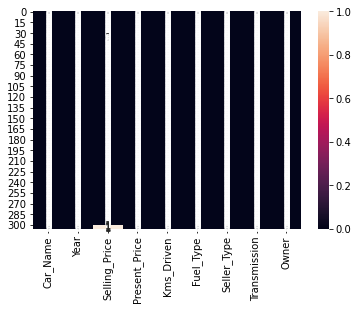

In [8]:
sns.heatmap(df.isna(),annot=True)

## Drop null value because it is less then 5%

In [9]:
df=df.dropna()

In [10]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [11]:
for col in df.columns[-3:]:
    print(df[col].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [12]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


#### Owner variable rep 0-first owner 1-Sec Owner 3-third owner

In [13]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

#### there so many car name so we can not use car name to predict selling price becz there are many numbers of cars

In [14]:
final_dataset=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [15]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
final_dataset['Current_year']=2021

In [17]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [18]:
final_dataset['No_years']=final_dataset['Current_year']-final_dataset['Year']

#### to drive no_year to find selling price we used feature engneering to create new column No_year using year and current_year column

In [19]:
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_year,No_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [20]:
# droping year and Current_year  column becz now it off no use

In [21]:
final_dataset.drop(['Year','Current_year'],axis=1,inplace=True)

In [22]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Encoder

In [23]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

#### to prevent from dummy variable trap we use drop_first=True

In [24]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


## Correlation

In [25]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878847,0.036125,-0.088950,-0.231271,0.551819,-0.540012,-0.549228,-0.366554
Present_Price,0.878847,1.000000,0.210469,0.007702,0.056517,0.472774,-0.464690,-0.511124,-0.348218
Kms_Driven,0.036125,0.210469,1.000000,0.091393,0.512085,0.178050,-0.178496,-0.113271,-0.167084
Owner,-0.088950,0.007702,0.091393,1.000000,0.188563,-0.053785,0.056010,0.125449,-0.050103
No_years,-0.231271,0.056517,0.512085,0.188563,1.000000,-0.059577,0.054989,0.023868,-0.005321
Fuel_Type_Diesel,0.551819,0.472774,0.178050,-0.053785,-0.059577,1.000000,-0.979631,-0.349428,-0.098058
Fuel_Type_Petrol,-0.540012,-0.464690,-0.178496,0.056010,0.054989,-0.979631,1.000000,0.357269,0.090410
Seller_Type_Individual,-0.549228,-0.511124,-0.113271,0.125449,0.023868,-0.349428,0.357269,1.000000,0.061676
Transmission_Manual,-0.366554,-0.348218,-0.167084,-0.050103,-0.005321,-0.098058,0.090410,0.061676,1.000000


<AxesSubplot:>

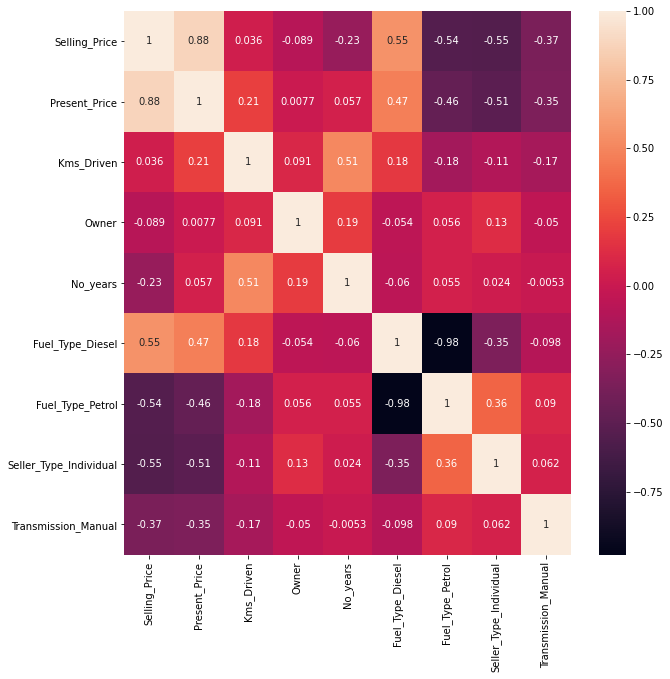

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(final_dataset.corr(),annot=True)

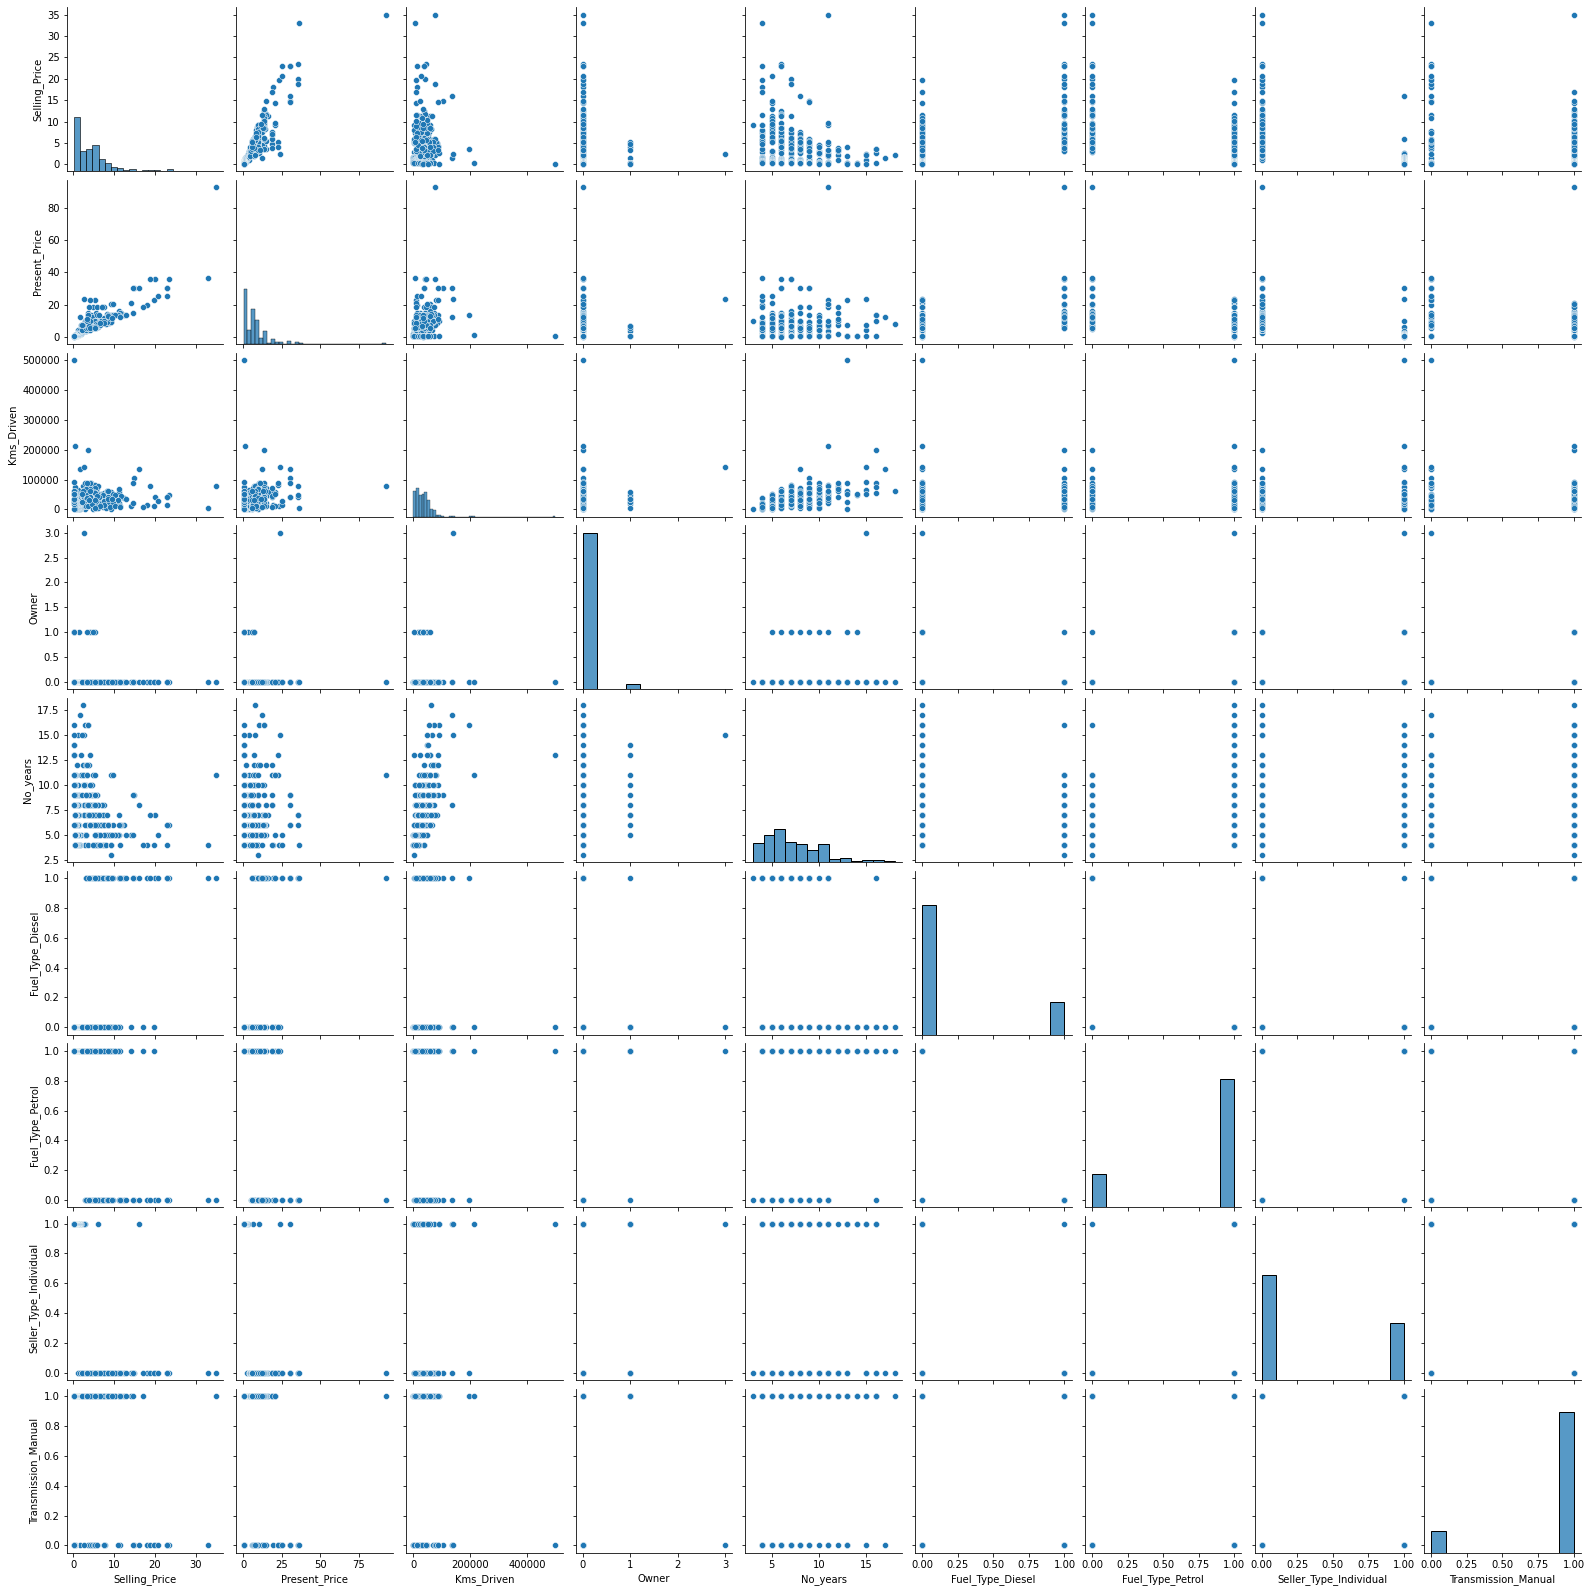

In [27]:
sns.pairplot(final_dataset)

<AxesSubplot:>

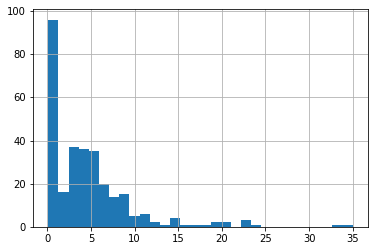

In [28]:
final_dataset['Selling_Price'].hist(bins=30)

# Divide x and y

In [29]:
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]

In [30]:
x

,Present_Price,Kms_Driven,Owner,No_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,0,5,1,0,0,1
297,5.90,60000,0,6,0,1,0,1
298,11.00,87934,0,12,0,1,0,1
299,12.50,9000,0,4,1,0,0,1


In [31]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 300, dtype: float64

In [32]:
### Feature Importance

In [33]:
et=ExtraTreesRegressor()


In [34]:
et.fit(x,y)

ExtraTreesRegressor()

In [35]:
print(et.feature_importances_)

[0.38690834 0.03752985 0.0008287  0.07677053 0.21776195 0.01350352
 0.12626801 0.1404291 ]


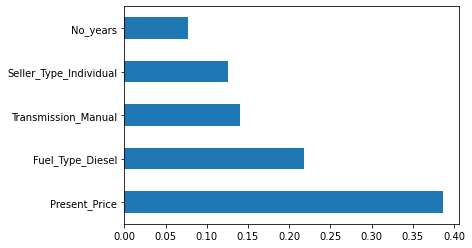

In [36]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(et.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3, random_state=0)

In [38]:
xtrain.shape

(210, 8)

#### In this we will use random forest regessor so that we do not have to scale the value because it uses decision tree estimator
##### using random forest we can reduce overfitting becz of number of decisiontree

In [39]:
rf1=RandomForestRegressor()
rf1.fit(xtrain,ytrain)

RandomForestRegressor()

In [40]:
ypred=rf1.predict(xtest)


In [41]:
print(r2_score(ytest,ypred))

0.9212647760076418


In [42]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 4)]
print(n_estimators)

[100, 200, 300, 400]


In [43]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [44]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [45]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [46]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10,cv = 5, verbose=2, n_jobs = 1)

In [47]:
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.3s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   1.2s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.2s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_features=auto, min_samples_leaf=10, min_samples_split=100, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='neg_mean_squared_error', verbose=2)

In [48]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

In [49]:
rf_random.best_score_

-2.7537280104732953

In [50]:
predictions=rf_random.predict(xtest)

In [51]:
predictions

array([ 4.92722189,  0.15527237,  6.85098484,  4.75718357,  5.0581623 ,
        0.40106719,  7.48358393,  4.29381139, 17.54632963,  1.15444278,
        4.67709378,  7.76810534,  0.34639053,  5.98939358,  3.10797493,
        4.31126853,  3.37187399,  8.26668087,  5.31035999,  0.44401705,
        0.25334688,  1.46809952,  1.14117712,  0.66808264,  6.94227961,
        1.26320194,  0.32413639,  4.63768737,  7.48358393,  9.25494993,
       20.61541706,  8.01921394,  7.49502803,  1.11149062,  3.02101329,
        0.33186426,  0.33513599,  0.28163302,  5.30290205,  7.68461413,
        5.22762116,  4.85034806, 19.44063891,  5.71437342,  4.55085463,
        1.04430734,  9.5858277 ,  4.14337433,  6.66625298,  3.11121819,
        5.97415123,  4.97098393,  0.36882858,  1.12447884,  7.25130934,
        5.38327183,  0.42948157,  3.61752335,  6.67249546,  0.57590498,
        0.51039259,  0.45069311, 23.25737509,  4.32735818,  5.67072553,
        2.96106869,  6.13490392,  1.32344835,  2.68814762,  2.42

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

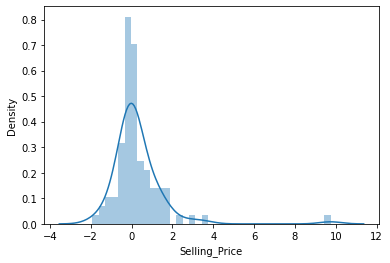

In [52]:
sns.distplot(ytest-predictions)

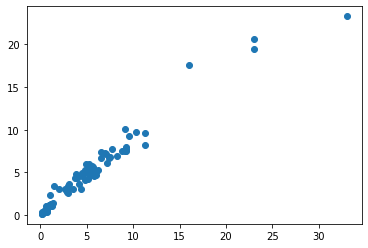

In [53]:
plt.scatter(ytest,predictions)

In [54]:
print(f'Accuracy:-{r2_score(ytest,predictions)}')
print(f'mse:-{mean_squared_error(ytest,predictions)}')
print(f'mae:-{mean_absolute_error(ytest,predictions)}')
print(f'rmse:-{np.sqrt(mean_squared_error(ytest,predictions))}')

Accuracy:-0.9330120750356159
mse:-1.8358859875518692
mae:-0.6866657010777288
rmse:-1.3549487029226859


In [55]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [56]:
###picke is an serialized file used for deploying